In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
os.chdir("drive/MyDrive/Cogni_AI/Hackathon_1")

### Importing libraries and importing data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score , accuracy_score
from sklearn.metrics import roc_auc_score,classification_report,accuracy_score

In [4]:
raw_train = pd.read_excel('MedicalData_Train.xlsx')
raw_test = pd.read_excel('MedicalData_Test.xlsx')

###EDA

In [5]:
raw_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
raw_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.00000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,53.760563,0.647887,1.056338,130.971831,247.220657,0.15493,0.553991,151.746479,0.300469,0.875587,1.478873,0.629108,2.206573,0.666667
std,8.953967,0.478754,1.040056,17.460715,52.936444,0.36269,0.525882,23.641217,0.459542,1.035805,0.603273,0.960787,0.594435,0.472515
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.00000,0.000000,139.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,240.000000,0.00000,1.000000,156.000000,0.000000,0.500000,2.000000,0.000000,2.000000,1.000000
75%,59.000000,1.000000,2.000000,140.000000,275.000000,0.00000,1.000000,169.000000,1.000000,1.500000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.00000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


In [7]:
raw_test.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,0.0
mean,55.800000,0.766667,0.755556,133.166667,244.000000,0.133333,0.466667,144.677778,0.388889,1.427778,1.211111,0.966667,2.566667,NaN
std,9.271437,0.425322,0.986551,17.722106,49.328525,0.341839,0.523600,20.332532,0.490229,1.342397,0.608820,1.126295,0.581552,NaN
min,35.000000,0.000000,0.000000,106.000000,149.000000,0.000000,0.000000,97.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,49.250000,1.000000,0.000000,120.000000,216.250000,0.000000,0.000000,131.000000,0.000000,0.200000,1.000000,0.000000,2.000000,NaN
50%,58.000000,1.000000,0.000000,130.000000,241.000000,0.000000,0.000000,145.500000,0.000000,1.200000,1.000000,1.000000,3.000000,NaN
75%,62.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,160.000000,1.000000,2.375000,2.000000,2.000000,3.000000,NaN
max,76.000000,1.000000,3.000000,200.000000,407.000000,1.000000,2.000000,182.000000,1.000000,6.200000,2.000000,4.000000,3.000000,NaN


In [8]:
df = raw_train.copy()
df_test = raw_test.copy()

In [9]:
df.shape

(213, 14)

In [10]:
df_test.shape

(90, 14)

In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Missing Values

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df_test.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target      90
dtype: int64

#### Duplicates

In [14]:
duplicate_rows= df[df.duplicated(keep='first')]
duplicate_rows.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [15]:
duplicate_rows= df_test[df_test.duplicated(keep='first')]
duplicate_rows.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
22,38,1,2,138,175,0,1,173,0,0.0,2,4,2,NaN


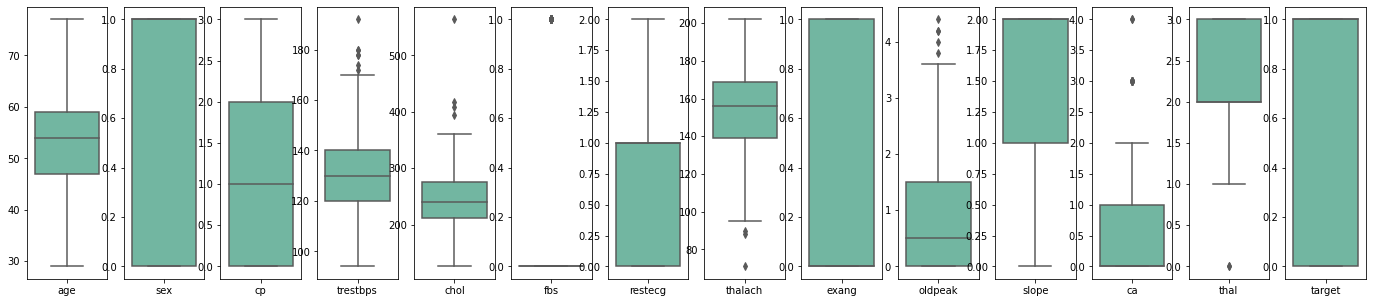

In [16]:
fig, (axes) = plt.subplots(nrows=1, ncols=14, figsize=(24, 5))

sns.boxplot(data=df[['age']], palette='Set2',ax=axes[0])
sns.boxplot(data=df[['sex']], palette='Set2',ax=axes[1])
sns.boxplot(data=df[['cp']], palette='Set2',ax=axes[2])
sns.boxplot(data=df[['trestbps']], palette='Set2',ax=axes[3])  
sns.boxplot(data=df[['chol']], palette='Set2',ax=axes[4])
sns.boxplot(data=df[['fbs']], palette='Set2',ax=axes[5])
sns.boxplot(data=df[['restecg']], palette='Set2',ax=axes[6])
sns.boxplot(data=df[['thalach']], palette='Set2',ax=axes[7])
sns.boxplot(data=df[['exang']], palette='Set2',ax=axes[8])
sns.boxplot(data=df[['oldpeak']], palette='Set2',ax=axes[9])
sns.boxplot(data=df[['slope']], palette='Set2',ax=axes[10])  
sns.boxplot(data=df[['ca']], palette='Set2',ax=axes[11])
sns.boxplot(data=df[['thal']], palette='Set2',ax=axes[12])
sns.boxplot(data=df[['target']], palette='Set2',ax=axes[13])
  

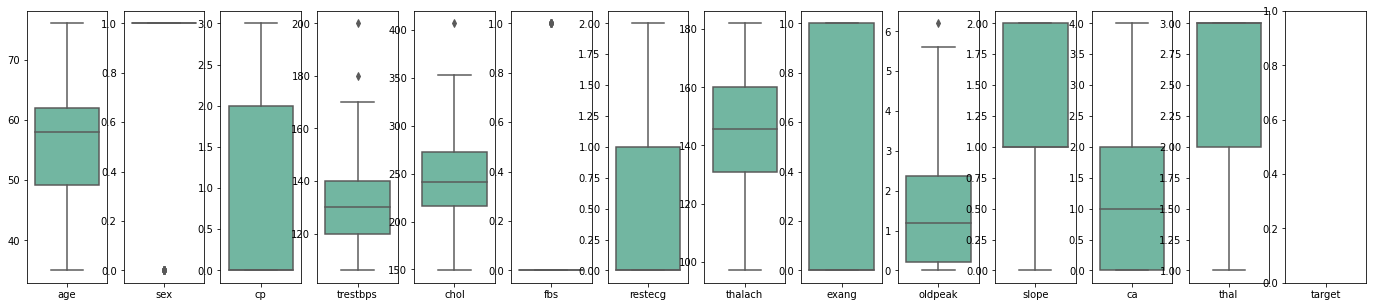

In [17]:
fig, (axes) = plt.subplots(nrows=1, ncols=14, figsize=(24, 5))

sns.boxplot(data=df_test[['age']], palette='Set2',ax=axes[0])
sns.boxplot(data=df_test[['sex']], palette='Set2',ax=axes[1])
sns.boxplot(data=df_test[['cp']], palette='Set2',ax=axes[2])
sns.boxplot(data=df_test[['trestbps']], palette='Set2',ax=axes[3])  
sns.boxplot(data=df_test[['chol']], palette='Set2',ax=axes[4])
sns.boxplot(data=df_test[['fbs']], palette='Set2',ax=axes[5])
sns.boxplot(data=df_test[['restecg']], palette='Set2',ax=axes[6])
sns.boxplot(data=df_test[['thalach']], palette='Set2',ax=axes[7])
sns.boxplot(data=df_test[['exang']], palette='Set2',ax=axes[8])
sns.boxplot(data=df_test[['oldpeak']], palette='Set2',ax=axes[9])
sns.boxplot(data=df_test[['slope']], palette='Set2',ax=axes[10])  
sns.boxplot(data=df_test[['ca']], palette='Set2',ax=axes[11])
sns.boxplot(data=df_test[['thal']], palette='Set2',ax=axes[12])
sns.boxplot(data=df_test[['target']], palette='Set2',ax=axes[13])
  

In [18]:
df['ca'].value_counts()

0    134
1     40
2     25
3     12
4      2
Name: ca, dtype: int64

In [19]:
df_test['ca'].value_counts()

0    41
1    25
2    13
3     8
4     3
Name: ca, dtype: int64

In [20]:
df_test['sex'].value_counts()

1    69
0    21
Name: sex, dtype: int64

#### Co-relation

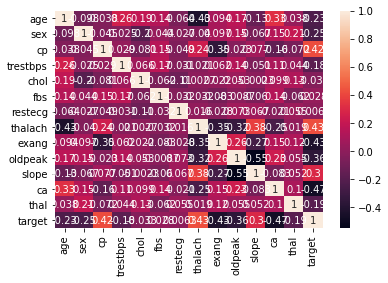

In [21]:
sns.heatmap(df.corr(), annot=True)

#### Values in each column

In [22]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 70, 77, 38])

In [23]:
df['sex'].unique()

array([1, 0])

In [24]:
df['cp'].unique()

array([3, 2, 1, 0])

In [25]:
df['trestbps'].unique()      

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 174, 192, 144, 123,
       146, 154, 114, 170, 164])

In [26]:
df['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 289, 322, 299, 300, 293, 282, 249, 274,
       184, 409, 259, 200, 228, 230, 206, 327, 149, 286, 237, 218, 319,
       166, 311, 335, 225, 169, 187, 176, 241, 131])

In [27]:
df['fbs'].unique()

array([1, 0])

In [28]:
df['restecg'].unique()

array([0, 1, 2])

In [29]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 109, 112,  88, 120, 195, 106,  95, 108, 117, 116, 103,  71,
       118, 141, 134, 136,  90])

In [30]:
df['exang'].unique()

array([0, 1])

In [31]:
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 2.2, 2.9,
       2.1, 0.9, 3.8, 3.4, 3.2, 0.3, 3.6, 4.4, 2.8, 4. ])

In [32]:
df['slope'].unique()

array([0, 2, 1])

In [33]:
df['ca'].unique()

array([0, 2, 1, 3, 4])

In [34]:
df['thal'].unique()

array([1, 2, 3, 0])

In [35]:
df['target'].unique()

array([1, 0])

#### Binning

In [36]:
region_sum = df.groupby('age')['target'].sum()
region_count = df.groupby('age')['target'].count()
region_percentage = ((region_count-region_sum)*100)/region_count
region_df = pd.DataFrame(region_percentage)
region_df.sort_values(by=['age'])

,target
age,
29,0.000000
34,0.000000
35,50.000000
37,0.000000
38,100.000000
39,0.000000
40,50.000000
41,0.000000
42,16.666667


### Scaling

In [37]:
#scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler

robust_scaler = RobustScaler()
filtered_columns= ['age', 'cp', 'trestbps', 'chol','restecg','thalach','oldpeak','slope',
       'ca', 'thal']
df_scale = df.reindex(columns=filtered_columns)
df_scale = pd.DataFrame(robust_scaler.fit_transform(df_scale),
                   columns=['age', 'cp', 'trestbps', 'chol','restecg','thalach','oldpeak','slope',
       'ca', 'thal'],
                   index = df.index)

In [38]:
df_scale['fbs']=df['fbs']
df_scale['sex']=df['sex']
df_scale['exang']=df['exang']
df_scale['target']=df['target']
df_scale.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,fbs,sex,exang,target
0,0.750000,1.0,0.75,-0.109375,-1.0,-0.200000,1.200000,-2.0,0.0,-1.0,1,1,0,1
1,-1.416667,0.5,0.00,0.156250,0.0,1.033333,2.000000,-2.0,0.0,0.0,0,1,0,1
2,-1.083333,0.0,0.00,-0.562500,-1.0,0.533333,0.600000,0.0,0.0,0.0,0,0,0,1
3,0.166667,0.0,-0.50,-0.062500,0.0,0.733333,0.200000,0.0,0.0,0.0,0,1,0,1
4,0.250000,-0.5,-0.50,1.781250,0.0,0.233333,0.066667,0.0,0.0,0.0,0,0,1,1


In [39]:
# scaled
x_train = df_scale.drop(['target'],axis=1)
y_train = df_scale['target']

In [40]:
# unscaled
#x_train = df.drop(['target'],axis=1)
#y_train = df['target']

In [41]:
df['target'].value_counts()

1    142
0     71
Name: target, dtype: int64

In [42]:
filtered_columns= ['age', 'cp', 'trestbps', 'chol','restecg','thalach','oldpeak','slope',
       'ca', 'thal']
df_test_scale = df_test.reindex(columns=filtered_columns)
df_test_scale = pd.DataFrame(robust_scaler.fit_transform(df_test_scale),
                   columns=['age', 'cp', 'trestbps', 'chol','restecg','thalach','oldpeak','slope',
       'ca', 'thal'],
                   index = df_test.index)

In [43]:
df_test_scale['fbs']=df_test['fbs']
df_test_scale['sex']=df_test['sex']
df_test_scale['exang']=df_test['exang']
df_test_scale['target']=df_test['target']
df_test_scale.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,fbs,sex,exang,target
0,-1.254902,1.0,-0.5,-0.563877,1.0,0.948276,-0.551724,0.0,-0.5,-1.0,0,0,0,NaN
1,0.705882,0.0,-1.2,-0.317181,1.0,-0.120690,-0.413793,1.0,0.5,-1.0,0,0,0,NaN
2,1.411765,1.0,0.5,-0.775330,2.0,-1.017241,-0.045977,0.0,-0.5,-1.0,0,0,0,NaN
3,0.941176,0.5,1.3,0.070485,0.0,-0.086207,-0.551724,1.0,-0.5,-1.0,0,1,0,NaN
4,-1.098039,1.0,-0.6,0.017621,1.0,0.120690,-0.413793,0.0,0.0,-1.0,0,0,0,NaN


In [52]:
#X_test = df_test_scale.drop(['target'],axis=1)

### Feature selection

In [44]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [45]:
sfs1 = SFS(LogisticRegression(),
         k_features=(3,11),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(x_train, y_train)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LogisticRegression(C=1.0, class_weight=None,
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=100,
                                                       multi_class='auto',
                                                       n_jobs=None,
                                                       penalty='l2',
                                                       random_state=None,
                                                       solver='lbfgs',
                                                       tol=0.0001, verbose=0,
                                                       warm_start=False),

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


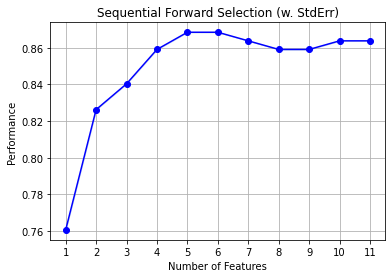

In [46]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [47]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [48]:
backward_elimination(x_train, y_train)

['cp', 'trestbps', 'thalach', 'oldpeak', 'ca', 'sex', 'exang']

In [49]:
# only selected features
filtered_columns= ['cp', 'trestbps', 'thalach', 'oldpeak', 'ca', 'sex', 'exang', 'target']
df_feature_selected = df_scale.reindex(columns=filtered_columns)

In [50]:
X_train = df_feature_selected.drop(['target'],axis=1)
Y_train = df_feature_selected['target']

In [51]:
df_test_feature_selected = df_test_scale.reindex(columns=filtered_columns)

In [52]:
X_test = df_test_feature_selected.drop(['target'],axis=1)

In [53]:
X_test.shape

(90, 7)

In [ ]:
#pip install --upgrade --no-deps statsmodels

### Spliting of data

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(X_train,Y_train, test_size=0.2,random_state=31)

In [55]:
x_train.head()

,cp,trestbps,thalach,oldpeak,ca,sex,exang
89,-0.5,-1.5,-1.133333,0.333333,0.0,0,0
205,-0.5,0.5,-0.400000,2.333333,2.0,1,1
2,0.0,0.0,0.533333,0.600000,0.0,0,0
108,0.0,-0.5,0.200000,0.400000,0.0,0,0
128,0.5,0.3,0.433333,-0.266667,0.0,0,0


In [56]:
y_train.head()

89     1
205    0
2      1
108    1
128    1
Name: target, dtype: int64

### Model Building

In [57]:
def print_stats(y_true,y_pred,y_pred_prob):
    print("ROC_AUC_Score",roc_auc_score(y_true,y_pred_prob))
    print("Classification report",classification_report(y_true, y_pred))
    print("Accuracy Score: ",accuracy_score(y_true, y_pred))

#### Logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression
def logistic_regression(x_train,y_train):
  clf = LogisticRegression()
  clf.fit(x_train,y_train)
  return clf

In [59]:
clf_lr = logistic_regression(x_train,y_train)
y_pred = clf_lr.predict(x_valid)
y_pred_prob=clf_lr.predict_proba(x_valid)[:, 1]

In [60]:
auc = roc_auc_score(y_valid, y_pred_prob)
print('AUC: %.3f' % auc)
print('accuracy_score test:', accuracy_score(y_valid,y_pred))  
print('F1 score',f1_score(y_valid, y_pred))

AUC: 0.929
accuracy_score test: 0.8837209302325582
F1 score 0.9180327868852458


####XGB

In [63]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(x_train, y_train)
y_pred = clf_xgb.predict(x_valid)
y_pred_prob=clf_xgb.predict_proba(x_valid)[:, 1]

In [64]:
auc = roc_auc_score(y_valid, y_pred_prob)
print('AUC: %.3f' % auc)
print('accuracy_score test:', accuracy_score(y_valid,y_pred))  
print('F1 score',f1_score(y_valid, y_pred))

AUC: 0.906
accuracy_score test: 0.7906976744186046
F1 score 0.847457627118644


In [ ]:
count=0
for value in y_train:
  if value == 0:
    count+=1
print(count)

57


In [ ]:
len(y_train)

170

In [ ]:
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.9064039408866995
Classification report               precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.83      0.86      0.85        29

    accuracy                           0.79        43
   macro avg       0.76      0.75      0.76        43
weighted avg       0.79      0.79      0.79        43

Accuracy Score:  0.7906976744186046


#### Neural Net

In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#import tensorflow as tf
#from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def build_classifier(optimizer):
  classifier = Sequential()  
  classifier.add(Dense(units = 6, kernel_initializer = 'uniform', 
                               activation = 'relu', input_dim = 13))  
  classifier.add(Dense(units = 6, kernel_initializer = 'uniform', 
                               activation = 'relu'))
  classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform', 
                              activation = 'sigmoid'))   
  #opt=tf.keras.optimizers.Adamax()
  classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy',
                  #metrics = [tf.keras.metrics.AUC()]
                  metrics = ['accuracy'])
  return classifier
  # classifier.fit(x_train, y_train, batch_size = 64, epochs = 100)

#### K-fold, cross validation 

(not needed)

In [ ]:
"""from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 64, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10, n_jobs = -1) 
mean = accuracies.mean()              
variance = accuracies.std()  
print("mean:{}".format(mean))
print("variance:{}".format(variance))
"""


'from keras.wrappers.scikit_learn import KerasClassifier\nfrom sklearn.model_selection import cross_val_score\nclassifier = KerasClassifier(build_fn = build_classifier, batch_size = 64, epochs = 100)\naccuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10, n_jobs = -1) \nmean = accuracies.mean()              \nvariance = accuracies.std()  \nprint("mean:{}".format(mean))\nprint("variance:{}".format(variance))\n'

#### Grid Search

parameters = {'batch_size': [10,15, 32, 50  ],
                        'epochs': [1000, 500, 200],
                        'optimizer': ['adam', opt]}


#### These are all the parameters tested for

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier)  

In [ ]:
#opt=tf.keras.optimizers.Adamax()
parameters = {'batch_size': [10,15  ],
                        'epochs': [1000, 500],
                        'optimizer': ['adam']} 

In [ ]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(x_train, y_train) 
best_parameters = grid_search.best_params_ #gives best parameters
best_accuracy = grid_search.best_score_        #gives best accuracy

print('best_parameters:{}'.format(best_parameters))
print('best_accuracy:{}'.format(best_accuracy))

Output hidden; open in https://colab.research.google.com to view.

#### Training the NN with correct parameter

In [66]:
# building the above classifier
def build_final_classifier():
  classifier = Sequential()  
  classifier.add(Dense(units = 6, kernel_initializer = 'uniform', 
                               activation = 'relu', input_dim = 7))  
  classifier.add(Dense(units = 6, kernel_initializer = 'uniform', 
                               activation = 'relu'))
  classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform', 
                              activation = 'sigmoid'))   
  #opt=tf.keras.optimizers.Adamax()
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                  #metrics = [tf.keras.metrics.AUC()]
                  metrics = ['accuracy'])
  return classifier

In [68]:
classifier = KerasClassifier(build_fn = build_final_classifier)  
classifier.fit(x_train, y_train, batch_size = 15, epochs = 43)
y_pred_prob = classifier.predict(x_valid)     #it will return probability
y_pred = (y_pred_prob > 0.5)      

Epoch 1/43
12/12 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.6165
Epoch 2/43
12/12 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.6670
Epoch 3/43
12/12 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.6805
Epoch 4/43
12/12 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.6380
Epoch 5/43
12/12 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.7098
Epoch 6/43
12/12 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.7052
Epoch 7/43
12/12 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.8061
Epoch 8/43
12/12 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.8412
Epoch 9/43
12/12 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.8212
Epoch 10/43
12/12 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.8002
Epoch 11/43
12/12 [

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [69]:
auc = roc_auc_score(y_valid, y_pred_prob)
print('AUC: %.3f' % auc)
print('accuracy_score test:', accuracy_score(y_valid,y_pred))  
print('F1 score',f1_score(y_valid, y_pred))

AUC: 0.840
accuracy_score test: 0.8837209302325582
F1 score 0.9180327868852458


In [70]:
from scipy import stats
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.8399014778325125
Classification report               precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.88      0.97      0.92        29

    accuracy                           0.88        43
   macro avg       0.89      0.84      0.86        43
weighted avg       0.89      0.88      0.88        43

Accuracy Score:  0.8837209302325582


In [ ]:
y_pred_prob

training on complete dataset

In [73]:
classifier = KerasClassifier(build_fn = build_final_classifier)  
classifier.fit(X_train, Y_train, batch_size = 15, epochs = 43)

Epoch 1/43
15/15 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.6501
Epoch 2/43
15/15 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.6932
Epoch 3/43
15/15 [==============================] - 0s 1ms/step - loss: 0.6726 - accuracy: 0.6414
Epoch 4/43
15/15 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.6771
Epoch 5/43
15/15 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.6765
Epoch 6/43
15/15 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.6697
Epoch 7/43
15/15 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.6829
Epoch 8/43
15/15 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.6247
Epoch 9/43
15/15 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.6786
Epoch 10/43
15/15 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.6097
Epoch 11/43
15/15 [

In [74]:
y_test_pred_prob = classifier.predict(X_test)     #it will return probability
#y_test_pred = (y_test_pred_prob > 0.5)           

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [76]:
X_test.shape

(90, 7)

In [77]:
X_test.head()

,cp,trestbps,thalach,oldpeak,ca,sex,exang
0,1.0,-0.5,0.948276,-0.551724,-0.5,0,0
1,0.0,-1.2,-0.120690,-0.413793,0.5,0,0
2,1.0,0.5,-1.017241,-0.045977,-0.5,0,0
3,0.5,1.3,-0.086207,-0.551724,-0.5,1,0
4,1.0,-0.6,0.120690,-0.413793,0.0,0,0


In [79]:
df_test.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,42,0,2,120,209,0,1,173,0,0.0,1,0,2,NaN


In [82]:
df_test =df_test.drop(['target'],axis=1)

In [83]:
Y_pred= pd.DataFrame(y_test_pred_prob, columns=['target'], index=df_test.index)
output_df= df_test.join(Y_pred)

In [85]:
output_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
1,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
2,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
3,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
4,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1


In [87]:
output_df['target'].value_counts()

1    75
0    15
Name: target, dtype: int64

In [88]:
df['target'].value_counts()

1    142
0     71
Name: target, dtype: int64

In [89]:
output_df.to_excel('Submission_Medical_874384.xlsx', index=None)